# Objetivos e Metodologia #

Em meus trabalhos anteriores, busquei realizar uma análise exploratória em cima do mercado de criptomoedas, identificando qual o melhor ativo em termos de risco-retorno para um potencial investidor através do cálculo de diferentes indices Share.

O objetivo desse trabalho é responder a seguinte pergunta: "Uma vez que o Ethereum é uma das criptomoedas mais atrativas dos últimos tempos, qual a melhor forma de gerenciar o risco de carteira ao investir nesse ativo?


Para isso utilizar-se-a como metodologia o Value-at-Risk (VaR) através de duas abordagens populares:
- Simulação de monte Carlo (Método semi-paramétrico) 
- Simulação Historica (Método não paramétrico)

todas as abordagens levaram em conta testes com 95% de confiança

Os dados serão extraídos da API do Yahoo Finance para os dados de 01/01/2022 ate 01/09/2022

______________________________

# 1 - Importar Bibliotecas e Dados Relevantes

In [1]:
import pandas as pd 
import numpy as np
from datetime import date 
from pandas_datareader import data as wb 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import skew, kurtosis

sns.set()

In [2]:
start_date = date(2022,1,1)
end_date = date(2022,9,1)
cripto = "ETC-USD"

In [3]:
etc = wb.DataReader(cripto, data_source = "yahoo", start = start_date, end = end_date )
etc.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-01,34.868908,34.104370,34.127926,34.868908,296981997,34.868908
2022-01-02,35.827923,34.393417,34.861294,35.396397,317124380,35.396397
2022-01-03,35.396278,34.238834,35.396278,34.707752,321506032,34.707752
2022-01-04,34.969547,34.000286,34.707985,34.171375,320064071,34.171375
2022-01-05,34.774685,30.916988,34.170959,32.077309,406196500,32.077309
2022-01-06,32.078541,30.829008,32.076229,31.661449,404049801,31.661449
2022-01-07,31.717400,29.469898,31.658976,30.440365,484193365,30.440365
2022-01-08,30.996729,28.557243,30.441378,29.407278,346457416,29.407278
2022-01-09,30.246172,29.242329,29.408775,29.766279,276026108,29.766279


# Análise Exploratória Inicial 

In [4]:
#Check de Missing Date 

etc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2022-01-01 to 2022-09-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       245 non-null    float64
 1   Low        245 non-null    float64
 2   Open       245 non-null    float64
 3   Close      245 non-null    float64
 4   Volume     245 non-null    int64  
 5   Adj Close  245 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.4 KB


Como a base de dados não apresenta missing values e todos os dados estão com os tipos corretamente estipulados, a análise pode continuar sem problemas...

In [5]:
#Construindo a base de retornos diários 

etc_returns = etc["Adj Close"].pct_change().mul(100).dropna()
etc_returns.head()

Date
2022-01-02    1.512777
2022-01-03   -1.945521
2022-01-04   -1.545410
2022-01-05   -6.128131
2022-01-06   -1.296428
Name: Adj Close, dtype: float64

In [6]:
# Estatísticas descritivas 

etc_returns.describe()

count    244.000000
mean       0.172495
std        6.497361
min      -17.095350
25%       -3.766880
50%       -0.262158
75%        3.064906
max       32.505888
Name: Adj Close, dtype: float64

C:\Users\emman\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


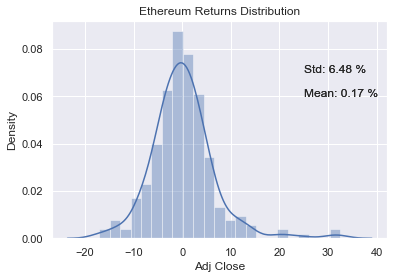

In [81]:
#gráfico de distribuição

sns.distplot(etc_returns, kde = True)
plt.title("Ethereum Returns Distribution")
plt.text(25,0.07,"Std: " + str(round(np.std(etc_returns),2)) + " %")
plt.text(25,0.07,"Std: " + str(round(np.std(etc_returns),2)) + " %")
plt.text(25,0.06,"Mean: " + str(round(np.mean(etc_returns),2)) + " %")
plt.text(25,0.06,"Mean: " + str(round(np.mean(etc_returns),2)) + " %")

plt.show()

In [8]:
# Assimetria e Curtose 

print(round(etc_returns.skew(),2),": Skewness")
print(round(etc_returns.kurtosis(),2), ": Kurtosis")

1.21 : Skewness
4.91 : Kurtosis


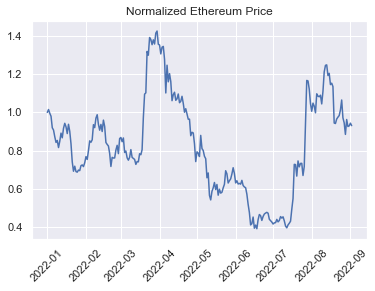

In [9]:
#serie histórica de preço 

plt.plot(etc["Adj Close"]/ etc["Adj Close"][0])
plt.title("Normalized Ethereum Price")
plt.xticks(rotation = 45)
plt.show()


# 2 - Aplicando o Value at Risk 

2.1 Uso da métodologia não paramétrica: Serie Histórica

In [10]:
var_95 = np.percentile(etc_returns, 5)
print("Value at Risk: ",round(var_95,2))

Value at Risk:  -8.74


Pela metodologia do VaR utilizando a serie histórica, significa que a perda potenciial limite de um investidor para um dia de trading é de 8,74% com 95% de confinança. Ou então, sigfnica que existe 5% de chance da perda potencial de um investidor superar 8,74% em um dia 

In [11]:
Cvar_95 = etc_returns[etc_returns <= np.percentile(etc_returns,5)].mean()
print("Conditional Value at Risk: ",round(Cvar_95,2))

Conditional Value at Risk:  -11.88


Ampliando o uso do Var, a aplicação do Value at Risk condicional mede a perda potencial considerando a média dos principais cenários de perda a partir de uma distribuição de probabilidade. No nosso caso, o CVar com 95% de confiança indicou que a perda potencial limite de um investidor gira em torno de 11,88% em um dia 

C:\Users\emman\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


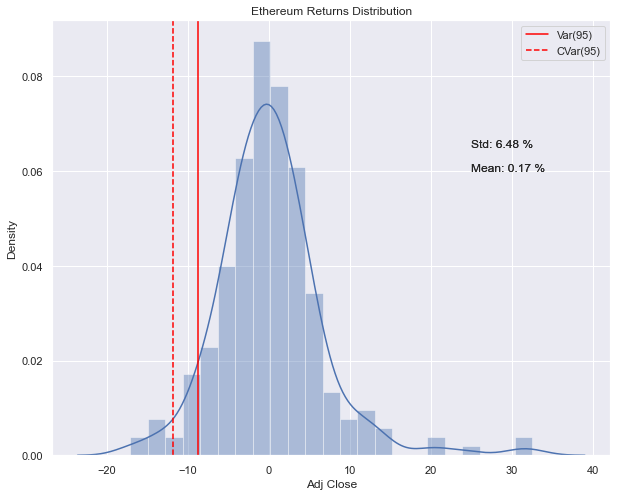

Value at Risk:  -8.74
Conditional Value at Risk:  -11.88


In [12]:
#plot no gráfico 

plt.figure(figsize= (10,8))
sns.distplot(etc_returns, kde = True)
plt.title("Ethereum Returns Distribution")
plt.text(25,0.065,"Std: " + str(round(np.std(etc_returns),2)) + " %")
plt.text(25,0.065,"Std: " + str(round(np.std(etc_returns),2)) + " %")
plt.text(25,0.06,"Mean: " + str(round(np.mean(etc_returns),2)) + " %")
plt.text(25,0.06,"Mean: " + str(round(np.mean(etc_returns),2)) + " %")
plt.axvline(x = var_95, color = "Red", label = "Var(95)")
plt.axvline(x = Cvar_95, color = "Red", label = "CVar(95)", linestyle = "--")
plt.legend()
plt.show()

print("Value at Risk: ",round(var_95,2))
print("Conditional Value at Risk: ",round(Cvar_95,2))

2.2 Monte Carlo Simulation

In [13]:
mean_returns = np.mean(etc_returns)
std_returns = np.std(etc_returns)
periods = len(etc_returns)
MC_returns = []


for i in range(1000):
    rand_returns = np.random.normal(mean_returns, std_returns, periods)
    MC_returns.append(rand_returns)




In [59]:
Var_MC_95 = np.percentile(MC_returns, 5)

print("Monte Carlo VaR: ",round(Var_MC_95,2))

Monte Carlo VaR:  -10.51


# 3 Comparando os resultados 

                  Var Methods  Results
0             Monte Carlo VaR  -10.513
1   Historical Simulation VaR -8.73875
2  Historical Simulation CVaR -11.8797


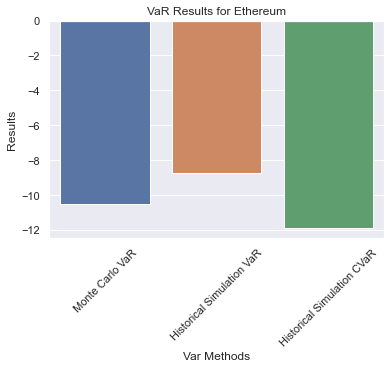

In [93]:
var_results = [Var_MC_95, var_95,Cvar_95]
var_names = ["Monte Carlo VaR", "Historical Simulation VaR", "Historical Simulation CVaR"]

Value_at_Risk = pd.DataFrame(data = (var_names, var_results)).T
Value_at_Risk.columns = ["Var Methods", "Results"]


sns.barplot(data = Value_at_Risk, x = "Var Methods", y = "Results")
plt.xticks(rotation = 45)
plt.title("VaR Results for Ethereum")
print(Value_at_Risk)

#  4 Conclusões 

Ao comparar as diferentes metodologias de Value at Risk para os retornos da criptomoeda Ethereum em 2022, conclui-se que a perda esperada para 1 dia de trading considerando uma confiança de 95% tem seu menor valor em 8.73% (considerando estatísticas mais modestas) e seu maior valor em 11.8% (considerando estatísticas mais apuradas).

Para ilustar melhor, imagine que um investidor possua uma posição de 1 milhão alocado em Ethereum. Através do Value-at- Risk (VaR) calculado, existe uma perda potencial de até $118.000 em apenas um dia de trading considerando uma confiança de 95%. 

Esse tipo de informação deve ser esclarecida para o investidor, de modo que ele esteja ciente de que seu portifólio pode desvalorizar mais de 10% em apenas um dia. Ou seja, um assessor de investimentos deveria realizar perguntas como: 

"Você esta disposto a correr esse risco?"

"Caso o pior aconteça, o prejuízo impactara signifcantemente na sua expectativa de investimentos?" 

"Existe uma reserva de emergencia para casos de perda significativa?" 



Neste estudo utilizou-se a Simulação de Monte Carlo e análise histórica para o calculo do VaR, porém vale ressaltar que ainda existem várias metodologias disponíveis  e que é dever do pesquisador escolher qual a abordagem mais adequada para cada situação! 